In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pandas as pd

In [2]:
FILENAME = "../data/KarateClub.csv"

In [3]:
graph = nx.Graph()

with open(FILENAME) as fd:
    for line in fd:
        el = map(int, line.split(";"))
        graph.add_edge(*el)

# Degrees

In [4]:
stupen_vrcholu = [degree for node, degree in graph.degree()]
min_stupen_vrcholu = min(stupen_vrcholu)
max_stupen_vrcholu = max(stupen_vrcholu)
prumer_stupen_vrcholu = sum(stupen_vrcholu) / len(stupen_vrcholu)

print(f"min: {min_stupen_vrcholu}")
print(f"max: {max_stupen_vrcholu}")
print(f"prumer: {prumer_stupen_vrcholu:.2f}")

min: 1
max: 17
prumer: 4.59


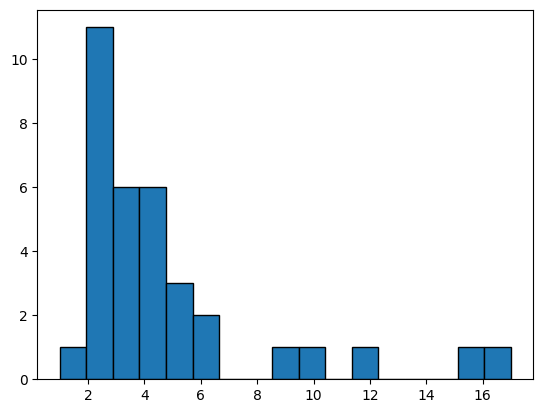

In [5]:
plt.hist(stupen_vrcholu, edgecolor="black", bins=max_stupen_vrcholu)
plt.show()

# Floyd

In [6]:
distances = nx.floyd_warshall(graph)

prumerna_vzdalenost = 0
n = len(distances)
total_pairs = 0

for i in distances:
    for j in distances[i]:
        if i == j:
            continue
        prumerna_vzdalenost += distances[i][j]
        total_pairs += 1

# Compute the average distance
prumerna_vzdalenost /= total_pairs
prumerna_vzdalenost

2.408199643493761

In [7]:
prumer = 0
for i in distances:
    for j in distances:
        prumer = max(prumer, distances[i][j])

int(prumer)

5

In [8]:
n = len(distances)
closeness = np.zeros((n,), dtype=np.float64)
for i in distances:
    sum = 0
    for j in distances:
        sum += distances[i][j]
    closeness[i - 1] = n / sum

pd.DataFrame(closeness)

,0
0,0.586207
1,0.500000
2,0.576271
3,0.478873
4,0.390805
5,0.395349
6,0.395349
7,0.453333
8,0.531250
9,0.447368
